<a href="https://colab.research.google.com/github/coder-j-0090/Self_Study/blob/main/Project/Intern_Project/Oasis_Infobyte_DS/2_Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unemployment Analysis with Python

There was a sharp increase in Covid caused numerous people to be unemployed in India. This projects analyze unemployment rate and predict 365 days later using Prophet

# Machine Learning Technique
## Prophet
    - Handles time-series data and make accurate forecasts

# 1. Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#I saved the csv file at google drive and imported to my colab.
unemployment = pd.read_csv('/content/drive/MyDrive/Internship/Accepted/Oasis_Infobyte_02152024~03152024 /Data Science Internship/DataSets/Unemployment in India.csv', encoding='utf-8')
#Show the first 5 rows of the csv file.
unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
#Show the last 100 rows of csv file(I chose a big number because some last rows were missing value)
unemployment.tail(100)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
668,Sikkim,31-05-2020,Monthly,19.75,75456.0,43.32,Urban
669,Sikkim,30-06-2020,Monthly,2.63,76269.0,35.85,Urban
670,Tamil Nadu,31-05-2019,Monthly,0.89,11798080.0,37.31,Urban
671,Tamil Nadu,30-06-2019,Monthly,1.56,12318745.0,39.16,Urban
672,Tamil Nadu,31-07-2019,Monthly,3.18,12054414.0,38.89,Urban
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check Basic Information


In [ ]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
unemployment.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
#Find all the regions in the file
unemployment['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [ ]:
#Check how many missing value does this file has
unemployment.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
#Delete all the missing values
unemployment = unemployment.dropna()
#Check if it is well dropped(deleted)
print('Head')
print(unemployment.head())
print('Tail')
print(unemployment.tail())

Head
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
Tail
          Region         Date  Frequency   Estimated Unemployment Rate 

In [ ]:
#Show Stat
unem_stat = unemployment[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
print(round(unemployment.describe().T, 2))

                                          count        mean         std  \
 Estimated Unemployment Rate (%)          740.0       11.79       10.72   
 Estimated Employed                       740.0  7204460.03  8087988.43   
 Estimated Labour Participation Rate (%)  740.0       42.63        8.11   
Month                                     740.0        6.39        3.24   

                                               min         25%         50%  \
 Estimated Unemployment Rate (%)              0.00        4.66        8.35   
 Estimated Employed                       49420.00  1190404.50  4744178.50   
 Estimated Labour Participation Rate (%)     13.33       38.06       41.16   
Month                                         1.00        4.00        6.00   

                                                  75%          max  
 Estimated Unemployment Rate (%)                15.89        76.74  
 Estimated Employed                       11275489.50  45777509.00  
 Estimated Labour Particip

In [ ]:
#Change the format of unemployment['Date']
import datetime as dt
import calendar
#Add Month as number at the file
unemployment[' Date'] = pd.to_datetime(unemployment[' Date'])
unemployment['Month'] = unemployment[' Date'].dt.month
#Add Month as name(Ex. Jan, Feb, etc.) at the file
unemployment['Month_name'] = unemployment['Month'].apply(lambda x : calendar.month_abbr[x])
#Check if it is added.
unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Month_name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


# 2. Data Visualization

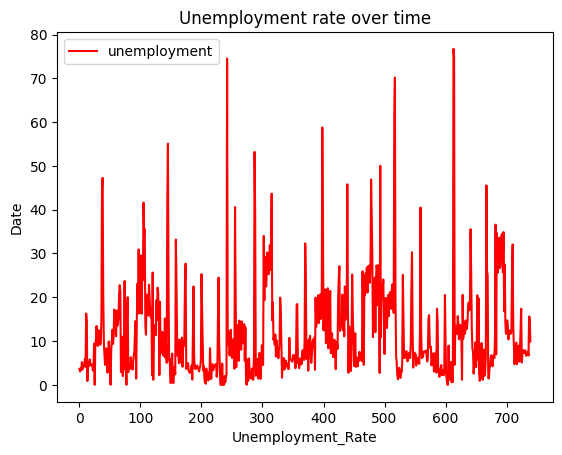

In [ ]:
import matplotlib.pyplot as plt

#Unemployment graph
unem_dict = {'unem_x' : range(len(unemployment)), 'unem_y' : unemployment[' Estimated Unemployment Rate (%)']}
plt.plot('unem_x', 'unem_y', data = unem_dict, color='r')

plt.xlabel('Unemployment_Rate')
plt.ylabel('Date')
plt.title('Unemployment rate over time')
plt.legend(['unemployment'])
plt.show()

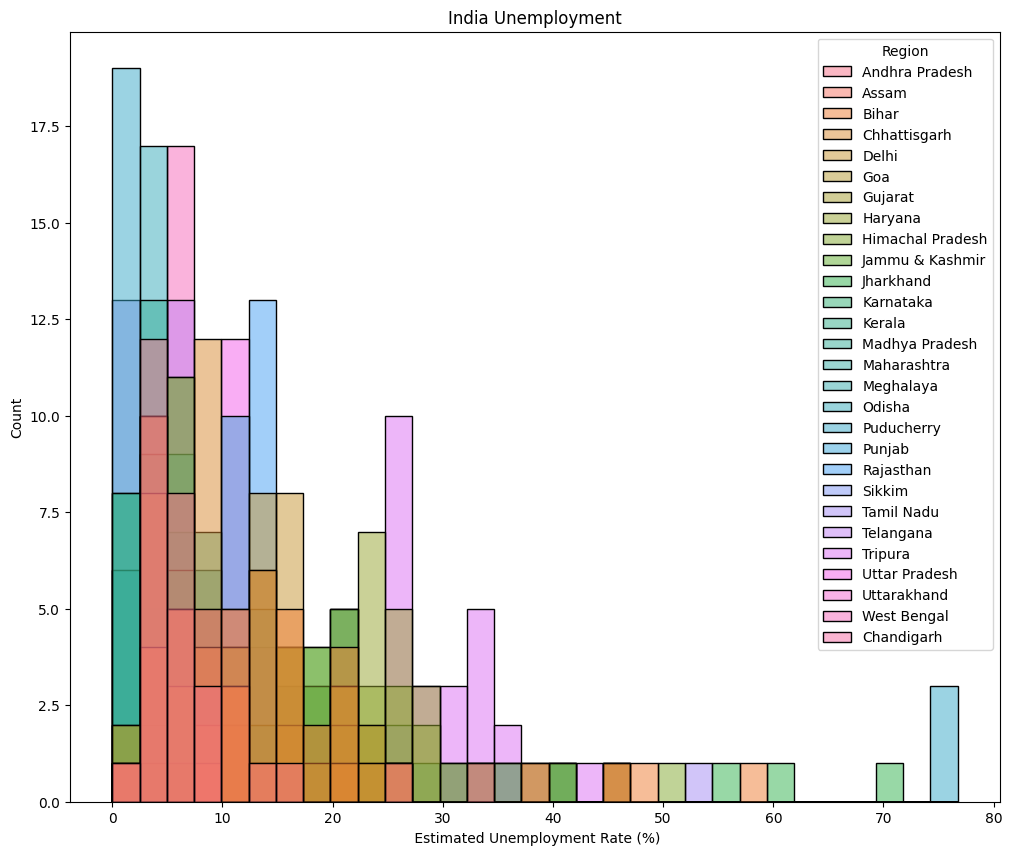

In [ ]:
import seaborn as sns
#Create histplot
plt.figure(figsize = (12,10))
plt.title('India Unemployment')
sns.histplot(x= ' Estimated Unemployment Rate (%)', hue = 'Region', data = unemployment)
plt.show()

In [ ]:
import plotly.express as px
#Create Sunburst Chart
sunburst_unem = unemployment[['Region',' Estimated Unemployment Rate (%)']]
fig = px.sunburst(sunburst_unem, path=['Region'], values = ' Estimated Unemployment Rate (%)',
                  width = 700, height = 700, title = 'Unemployment in India')
fig.show()

# 3. Prediction
    - Below is the prediction of 2021 Unemployment Rate using Time-Series Analysis and Forecasting

## Prophet
    - Handles time-series data and make accurate forecasts

In [ ]:
from prophet import Prophet

#Refine data for Prophet(Use Date and Estimated Unemployment Rate)
unem_prophet_data = unemployment[[' Date', ' Estimated Unemployment Rate (%)']].reset_index(drop=True)
print(unem_prophet_data)
unem_prophet_data = unem_prophet_data.rename(columns = {' Date':'ds', ' Estimated Unemployment Rate (%)':'y'})
unem_prophet_data.head()

          Date   Estimated Unemployment Rate (%)
0   2019-05-31                              3.65
1   2019-06-30                              3.05
2   2019-07-31                              3.75
3   2019-08-31                              3.32
4   2019-09-30                              5.17
..         ...                               ...
735 2020-02-29                              7.55
736 2020-03-31                              6.67
737 2020-04-30                             15.63
738 2020-05-31                             15.22
739 2020-06-30                              9.86

[740 rows x 2 columns]


,ds,y
0,2019-05-31,3.65
1,2019-06-30,3.05
2,2019-07-31,3.75
3,2019-08-31,3.32
4,2019-09-30,5.17


<Axes: xlabel='ds'>

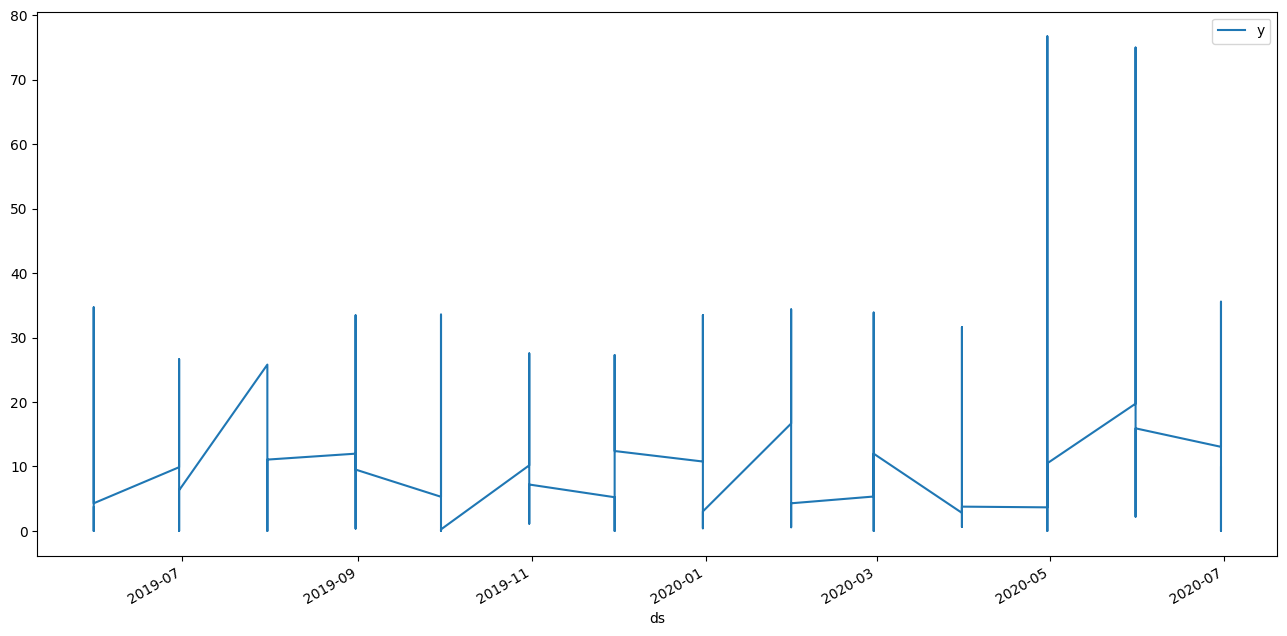

In [ ]:
#See how it is as a graph
unem_prophet_data.plot(x='ds', y='y', figsize = (16,8))

In [ ]:
#Train model and predict

unem_model = Prophet()
unem_model.fit(unem_prophet_data)
#Predict 365 days later
future_unem = unem_model.make_future_dataframe(periods=365)
#Check expected data
forecast_unem = unem_model.predict(future_unem)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo3m40egj/_v5zg5vz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo3m40egj/1jxff0wg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1288', 'data', 'file=/tmp/tmpo3m40egj/_v5zg5vz.json', 'init=/tmp/tmpo3m40egj/1jxff0wg.json', 'output', 'file=/tmp/tmpo3m40egj/prophet_model_lmcd57l/prophet_model-20240306110907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:07 - cmdstanpy - INFO - Chain 

In [ ]:
#I used tail to see if the prediction shows the data of 2021
forecast_unem.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
374,2021-06-26,37.828245,24.075934,51.281959,34.844547,41.107910,0.0,0.0,0.0,0.0,0.0,0.0,37.828245
375,2021-06-27,37.880209,25.738570,52.935755,34.878571,41.168645,0.0,0.0,0.0,0.0,0.0,0.0,37.880209
376,2021-06-28,37.932173,25.723453,50.695724,34.912762,41.236520,0.0,0.0,0.0,0.0,0.0,0.0,37.932173
377,2021-06-29,37.984137,24.772597,51.641977,34.946953,41.296408,0.0,0.0,0.0,0.0,0.0,0.0,37.984137
378,2021-06-30,38.036101,25.409690,51.911292,34.981272,41.355266,0.0,0.0,0.0,0.0,0.0,0.0,38.036101


### Show the prediciton as a graph

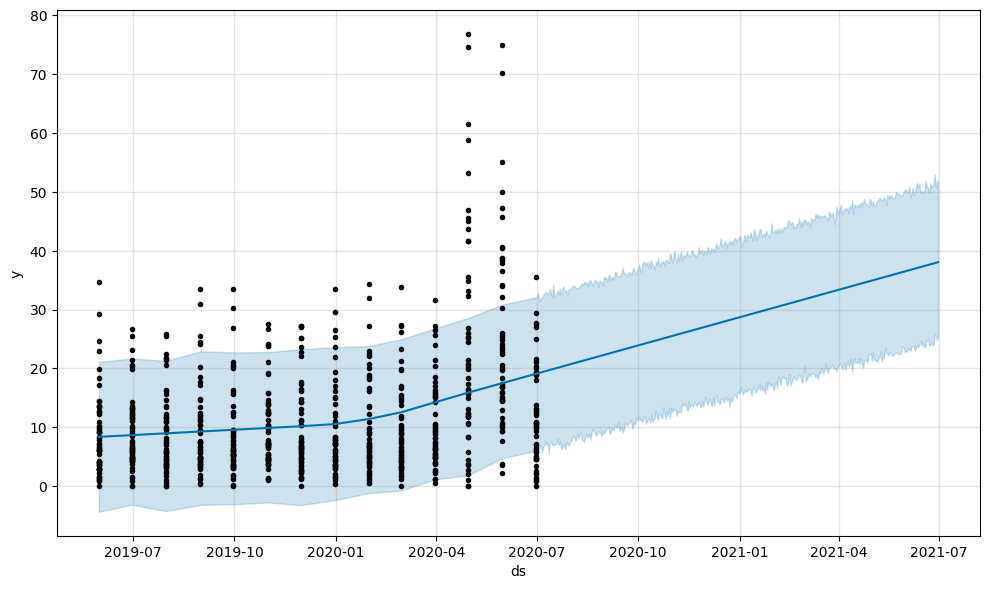

In [ ]:
#Black dots are estimated unemployment rate, and blue line is expectation line
fig = unem_model.plot(forecast_unem)

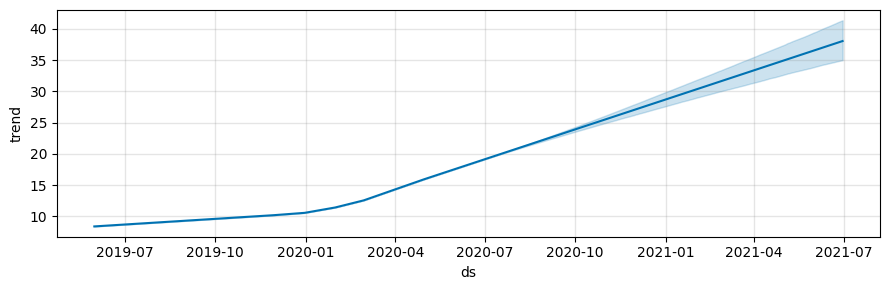

In [ ]:
fig2 = unem_model.plot_components(forecast_unem)